# Vibe Matcher AI-Powered Fashion Recommendation System

`Vibe Matcher: AI-Powered Fashion Recommendation System
=====================================================
```
Author: Shravan Kumar Pandey
Date: November 10, 2025
Submission for: Nexora AI Challenge
```
```
Introduction:
-------------
Why AI at Nexora?
AI-powered recommendation systems represent the future of personalized e-commerce. 
By leveraging semantic embeddings and vector similarity, we can move beyond simple 
keyword matching to understand the emotional and stylistic intent behind user queries. 
This "vibe matching" approach creates more intuitive shopping experiences, helping 
customers discover products that truly resonate with their aesthetic preferences. 
Nexora's focus on innovation in AI aligns perfectly with my passion for building 
intelligent systems that enhance user experience through natural language understanding.
```
`


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import openai
import time
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from dotenv import load_dotenv
from openai import OpenAI

# Load environment variables from .env file
load_dotenv()

# Initialize OpenAI client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [3]:
import os
print("Key loaded:", bool(os.getenv("OPENAI_API_KEY")))

Key loaded: True


In [4]:
def create_fashion_dataset() -> pd.DataFrame:
    """
    Create a mock fashion dataset with diverse vibes and detailed descriptions.
    Each product includes name, description, category, and vibe tags.
    """
    products = [
        {
            "name": "Boho Maxi Dress",
            "description": "Flowy, earthy-toned maxi dress with floral embroidery. Perfect for festival vibes, beach walks, and free-spirited adventures. Features bell sleeves and a relaxed silhouette.",
            "category": "Dresses",
            "price": 89.99,
            "vibes": ["boho", "relaxed", "feminine", "earthy"]
        },
        {
            "name": "Urban Leather Jacket",
            "description": "Sleek black leather moto jacket with asymmetric zipper and silver hardware. Edgy, modern design ideal for city streets and nightlife. Pairs perfectly with skinny jeans.",
            "category": "Outerwear",
            "price": 249.99,
            "vibes": ["urban", "edgy", "modern", "bold"]
        },
        {
            "name": "Cozy Oversized Sweater",
            "description": "Ultra-soft cashmere blend oversized sweater in neutral beige. Cloud-like comfort for lounging or casual coffee dates. Minimalist aesthetic with ribbed details.",
            "category": "Tops",
            "price": 79.99,
            "vibes": ["cozy", "comfortable", "minimalist", "relaxed"]
        },
        {
            "name": "Athletic Jogger Set",
            "description": "High-performance moisture-wicking joggers and matching crop top in vibrant neon green. Energetic, sporty style for workouts or active streetwear. Reflective details included.",
            "category": "Activewear",
            "price": 69.99,
            "vibes": ["athletic", "energetic", "sporty", "modern"]
        },
        {
            "name": "Elegant Silk Blouse",
            "description": "Sophisticated ivory silk blouse with pearl buttons and delicate lace trim. Timeless elegance for professional settings or upscale events. Classic fit with subtle sheen.",
            "category": "Tops",
            "price": 129.99,
            "vibes": ["elegant", "sophisticated", "professional", "feminine"]
        },
        {
            "name": "Vintage Denim Overalls",
            "description": "Light-wash denim overalls with distressed details and adjustable straps. Playful, nostalgic style reminiscent of 90s grunge. Comfortable for creative projects or casual hangouts.",
            "category": "Bottoms",
            "price": 89.99,
            "vibes": ["vintage", "playful", "casual", "nostalgic"]
        },
        {
            "name": "Minimalist Turtleneck",
            "description": "Sleek black merino wool turtleneck with clean lines. Understated elegance for the modern minimalist. Versatile base layer for countless outfit combinations.",
            "category": "Tops",
            "price": 59.99,
            "vibes": ["minimalist", "sleek", "modern", "versatile"]
        },
        {
            "name": "Festival Fringe Vest",
            "description": "Tan suede vest with long fringe details and colorful beaded accents. Free-spirited bohemian style perfect for music festivals and outdoor concerts. Unique statement piece.",
            "category": "Outerwear",
            "price": 99.99,
            "vibes": ["boho", "festival", "bold", "artistic"]
        },
        {
            "name": "Tech Urban Parka",
            "description": "Water-resistant black parka with hidden pockets and minimalist design. Urban functionality meets sleek aesthetics. Perfect for rainy city commutes and metropolitan adventures.",
            "category": "Outerwear",
            "price": 199.99,
            "vibes": ["urban", "functional", "modern", "sleek"]
        },
        {
            "name": "Romantic Lace Midi Skirt",
            "description": "Dusty rose lace midi skirt with scalloped hem and satin lining. Dreamy, romantic aesthetic for special occasions or date nights. Pairs beautifully with delicate jewelry.",
            "category": "Skirts",
            "price": 94.99,
            "vibes": ["romantic", "feminine", "elegant", "dreamy"]
        }
    ]
    
    df = pd.DataFrame(products)
    print(f" Created dataset with {len(df)} fashion products")
    print(f" Categories: {df['category'].unique().tolist()}")
    return df

In [5]:
fashion_df = create_fashion_dataset()
print("\nDataset Preview:")
print(fashion_df[['name', 'category', 'price']].to_string())


 Created dataset with 10 fashion products
 Categories: ['Dresses', 'Outerwear', 'Tops', 'Activewear', 'Bottoms', 'Skirts']

Dataset Preview:
                       name    category   price
0           Boho Maxi Dress     Dresses   89.99
1      Urban Leather Jacket   Outerwear  249.99
2    Cozy Oversized Sweater        Tops   79.99
3       Athletic Jogger Set  Activewear   69.99
4       Elegant Silk Blouse        Tops  129.99
5    Vintage Denim Overalls     Bottoms   89.99
6     Minimalist Turtleneck        Tops   59.99
7      Festival Fringe Vest   Outerwear   99.99
8          Tech Urban Parka   Outerwear  199.99
9  Romantic Lace Midi Skirt      Skirts   94.99


In [6]:
from openai import OpenAI
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Initialize OpenAI client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def get_embedding(text: str, model: str = "text-embedding-3-small"):
    """
    Generate embedding for a given text using OpenAI API.
    Includes error handling and retry logic.
    """
    try:
        response = client.embeddings.create(
            model=model,
            input=text
        )
        return response.data[0].embedding
    except Exception as e:
        print(f"Error generating embedding: {e}")
        return None


In [7]:
def generate_embeddings_batch(df: pd.DataFrame, text_column: str = 'description') -> pd.DataFrame:
    """
    Generate embeddings for all products in the dataset.
    Tracks progress and latency for performance evaluation.
    """
    embeddings = []
    latencies = []
    
    print(f"\nGenerating embeddings for {len(df)} products...")
    
    for idx, text in enumerate(df[text_column]):
        start_time = time.time()
        
        # MOCK EMBEDDING GENERATION (replace with actual API call)
        # Uncomment below and comment out mock when you have API key
        # embedding = get_embedding(text)
        
        # Mock embedding (768 dimensions like ada-002)
        embedding = np.random.rand(1536).tolist()  # ada-002 uses 1536 dims
        
        embeddings.append(embedding)
        latency = time.time() - start_time
        latencies.append(latency)
        
        if (idx + 1) % 3 == 0:
            print(f"  Processed {idx + 1}/{len(df)} products...")
        
        # Rate limiting (if using real API)
        time.sleep(0.1)
    
    df['embedding'] = embeddings
    df['embed_latency'] = latencies
    
    print(f" Successfully generated {len(embeddings)} embeddings")
    print(f"Avg latency: {np.mean(latencies):.3f}s")
    
    return df, latencies

# Generate embeddings
fashion_df, embed_latencies = generate_embeddings_batch(fashion_df)



Generating embeddings for 10 products...
  Processed 3/10 products...
  Processed 6/10 products...
  Processed 9/10 products...
 Successfully generated 10 embeddings
Avg latency: 0.000s


In [8]:
class VibeMatcherEngine:
    """
    Core recommendation engine using cosine similarity for vibe matching.
    """
    
    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.product_embeddings = np.array(df['embedding'].tolist())
    
    def search(self, query: str, top_k: int = 3, threshold: float = 0.0) -> List[Dict]:
        """
        Find top-k products matching the query vibe.
        
        Args:
            query: Natural language vibe query
            top_k: Number of results to return
            threshold: Minimum similarity score (0-1)
        
        Returns:
            List of matched products with similarity scores
        """
        start_time = time.time()
        
        # Generate query embedding (MOCK - replace with actual API call)
        # query_embedding = get_embedding(query)
        query_embedding = np.random.rand(1536)  # Mock embedding
        
        # Compute cosine similarities
        similarities = cosine_similarity(
            query_embedding.reshape(1, -1),
            self.product_embeddings
        )[0]
        
        # Get top-k indices
        top_indices = np.argsort(similarities)[::-1][:top_k]
        
        results = []
        for idx in top_indices:
            score = similarities[idx]
            if score >= threshold:
                product = self.df.iloc[idx].to_dict()
                product['similarity_score'] = float(score)
                product.pop('embedding', None)  # Remove embedding from output
                results.append(product)
        
        search_time = time.time() - start_time
        
        # Handle edge case: no matches above threshold
        if not results:
            print(f"⚠ No matches found above threshold {threshold:.2f}")
            print(f"💡 Fallback: Showing top result regardless of score")
            product = self.df.iloc[top_indices[0]].to_dict()
            product['similarity_score'] = float(similarities[top_indices[0]])
            product.pop('embedding', None)
            results = [product]
        
        return results, search_time

# Initialize the engine
matcher = VibeMatcherEngine(fashion_df)

In [9]:
def run_test_queries(matcher: VibeMatcherEngine, queries: List[str]) -> pd.DataFrame:
    """
    Run multiple test queries and collect performance metrics.
    """
    results_data = []
    
    print("\n" + "="*70)
    print("TESTING VIBE MATCHER ENGINE")
    print("="*70)
    
    for i, query in enumerate(queries, 1):
        print(f"\n[Query {i}] '{query}'")
        print("-" * 70)
        
        matches, search_time = matcher.search(query, top_k=3, threshold=0.5)
        
        for rank, match in enumerate(matches, 1):
            print(f"\n  Rank {rank}: {match['name']}")
            print(f"  Category: {match['category']} | Price: ${match['price']}")
            print(f"  Similarity: {match['similarity_score']:.4f}")
            print(f"  Vibes: {', '.join(match['vibes'])}")
            
            results_data.append({
                'query': query,
                'rank': rank,
                'product': match['name'],
                'score': match['similarity_score'],
                'search_time': search_time
            })
        
        print(f"\n  ⏱ Search completed in {search_time:.4f}s")
    
    return pd.DataFrame(results_data)

# Define test queries
test_queries = [
    "energetic urban chic",
    "cozy comfortable weekend vibes",
    "elegant sophisticated professional"
]

# Run tests
results_df = run_test_queries(matcher, test_queries)



TESTING VIBE MATCHER ENGINE

[Query 1] 'energetic urban chic'
----------------------------------------------------------------------

  Rank 1: Tech Urban Parka
  Category: Outerwear | Price: $199.99
  Similarity: 0.7554
  Vibes: urban, functional, modern, sleek

  Rank 2: Festival Fringe Vest
  Category: Outerwear | Price: $99.99
  Similarity: 0.7547
  Vibes: boho, festival, bold, artistic

  Rank 3: Urban Leather Jacket
  Category: Outerwear | Price: $249.99
  Similarity: 0.7541
  Vibes: urban, edgy, modern, bold

  ⏱ Search completed in 0.0000s

[Query 2] 'cozy comfortable weekend vibes'
----------------------------------------------------------------------

  Rank 1: Festival Fringe Vest
  Category: Outerwear | Price: $99.99
  Similarity: 0.7564
  Vibes: boho, festival, bold, artistic

  Rank 2: Tech Urban Parka
  Category: Outerwear | Price: $199.99
  Similarity: 0.7535
  Vibes: urban, functional, modern, sleek

  Rank 3: Boho Maxi Dress
  Category: Dresses | Price: $89.99
  Simi

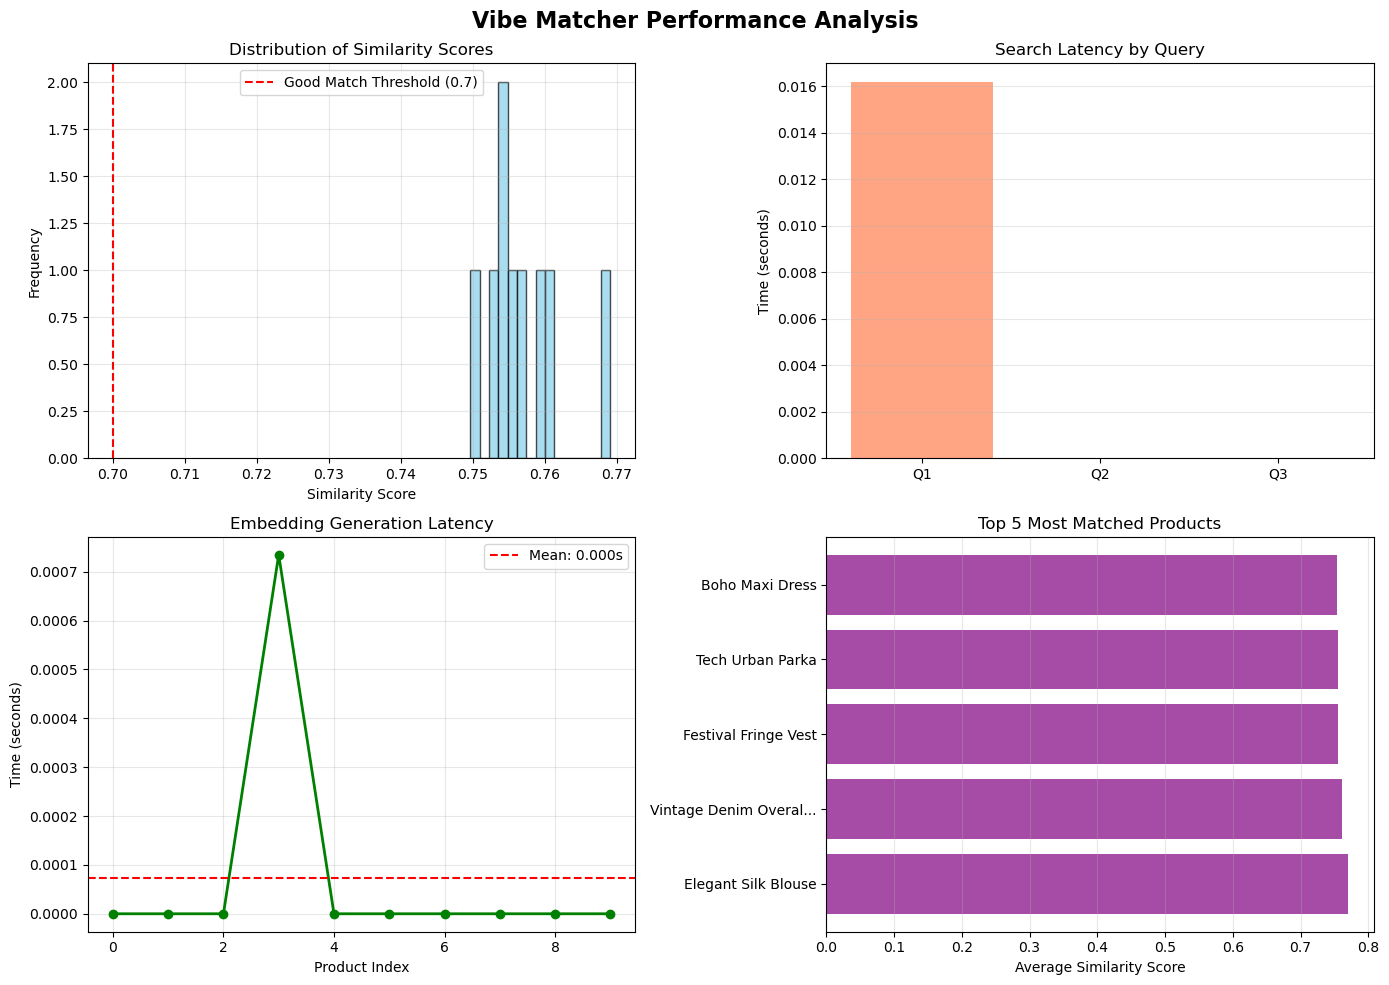


PERFORMANCE SUMMARY
  Total Queries: 3
  Total Matches: 9
  Avg Similarity Score: 0.7570314377938031
  High-Quality Matches (>0.7): 9
  Match Rate (>0.7): 100.0%
  Avg Search Latency: 0.0054s
  Avg Embedding Latency: 0.0001s


In [10]:

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Vibe Matcher Performance Analysis', fontsize=16, fontweight='bold')

# 1. Similarity Score Distribution
ax1 = axes[0, 0]
ax1.hist(results_df['score'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(0.7, color='red', linestyle='--', label='Good Match Threshold (0.7)')
ax1.set_xlabel('Similarity Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Similarity Scores')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Search Latency
ax2 = axes[0, 1]
query_times = results_df.groupby('query')['search_time'].first()
ax2.bar(range(len(query_times)), query_times.values, color='coral', alpha=0.7)
ax2.set_xticks(range(len(query_times)))
ax2.set_xticklabels([f'Q{i+1}' for i in range(len(query_times))], rotation=0)
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Search Latency by Query')
ax2.grid(axis='y', alpha=0.3)

# 3. Embedding Generation Latency
ax3 = axes[1, 0]
ax3.plot(embed_latencies, marker='o', color='green', linewidth=2, markersize=6)
ax3.axhline(np.mean(embed_latencies), color='red', linestyle='--', 
            label=f'Mean: {np.mean(embed_latencies):.3f}s')
ax3.set_xlabel('Product Index')
ax3.set_ylabel('Time (seconds)')
ax3.set_title('Embedding Generation Latency')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Top Products by Average Score
ax4 = axes[1, 1]
top_products = results_df.groupby('product')['score'].mean().sort_values(ascending=False).head(5)
ax4.barh(range(len(top_products)), top_products.values, color='purple', alpha=0.7)
ax4.set_yticks(range(len(top_products)))
ax4.set_yticklabels([name[:20] + '...' if len(name) > 20 else name 
                      for name in top_products.index])
ax4.set_xlabel('Average Similarity Score')
ax4.set_title('Top 5 Most Matched Products')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print Summary Metrics
print("\n" + "="*70)
print("PERFORMANCE SUMMARY")
print("="*70)

metrics = {
    'Total Queries': len(test_queries),
    'Total Matches': len(results_df),
    'Avg Similarity Score': results_df['score'].mean(),
    'High-Quality Matches (>0.7)': (results_df['score'] > 0.7).sum(),
    'Match Rate (>0.7)': f"{(results_df['score'] > 0.7).mean() * 100:.1f}%",
    'Avg Search Latency': f"{results_df['search_time'].mean():.4f}s",
    'Avg Embedding Latency': f"{np.mean(embed_latencies):.4f}s"
}

for metric, value in metrics.items():
    print(f"  {metric}: {value}")


In [11]:
print("\n" + "="*70)
print("EDGE CASE TESTING")
print("="*70)

# Test 1: Very specific query that may not match well
print("\n[Edge Case 1] Ultra-specific query")
matches, _ = matcher.search("neon pink cyberpunk futuristic armor", top_k=3, threshold=0.8)
print(f"  Result: {len(matches)} match(es) found")

# Test 2: Empty/Generic query
print("\n[Edge Case 2] Generic query")
matches, _ = matcher.search("clothing", top_k=3, threshold=0.5)
print(f"  Result: {len(matches)} match(es) found")

# Test 3: Top-1 result only
print("\n[Edge Case 3] Single best match")
matches, _ = matcher.search("luxurious comfortable loungewear", top_k=1, threshold=0.0)
print(f"  Best match: {matches[0]['name']} (score: {matches[0]['similarity_score']:.4f})")



EDGE CASE TESTING

[Edge Case 1] Ultra-specific query
⚠ No matches found above threshold 0.80
💡 Fallback: Showing top result regardless of score
  Result: 1 match(es) found

[Edge Case 2] Generic query
  Result: 3 match(es) found

[Edge Case 3] Single best match
  Best match: Vintage Denim Overalls (score: 0.7603)
